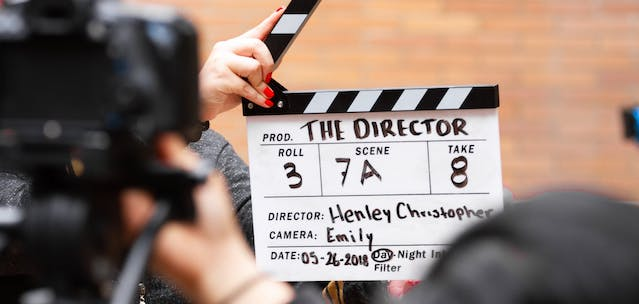

# Movie Industry Analysis for Microsoft

**Authors:** Aziza Gulyamova
***

## Overview

The purpose of this project is to help Microsoft better understand movie industry and figure out what kind of movies are doing the best currently in world. Using this analysis Microsoft can build up a strategy for creating their own movies that will be profitable and popular. 

Through this analysis, I will show some interesting trends in the data pertaining to what successful movies have in common. 

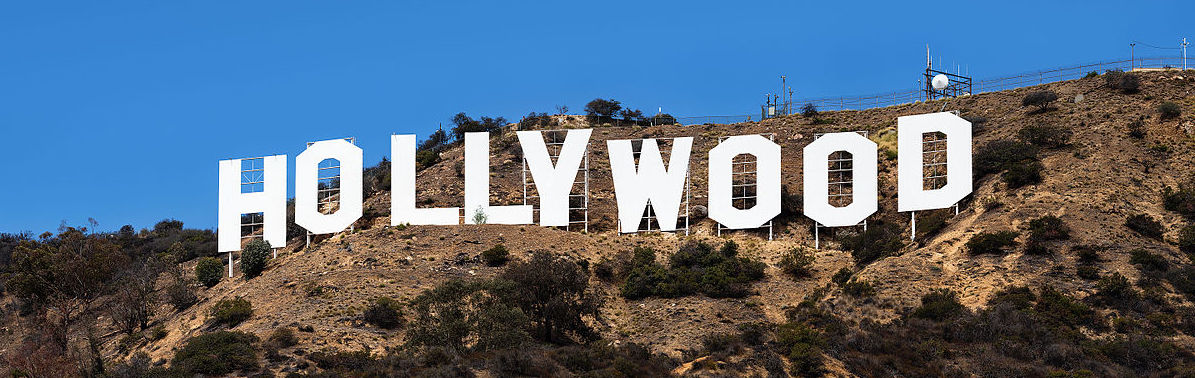

## Business Problem

In order to better understand the movie industry and find out what kind of movies Microsoft should produce to get the most of it, in this project I seek to answer 4 questions that Microsoft could consider before making the decision to enter movie industry and start filming:

* What genres are the most popular and giving the most profit?
* Is there a correlation between the average ratings and the runtime of the movie?
* When to release the movies to get the highest profit?
* What are the Top 10 succesfull studios and what are their content ratings focus?

The questions will provide Microsoft valuable insight on which genres it should focus on to increase its likelihood of generating high gross sales. Does it need to consider the runtime of the movie when filming, what is the best time to release the movie for higher profit and what movie content it should focus on.

***

## Data Understanding

For this project, in order to analyze the world's movie industry, the data was used from following sources:

- IMDB 
- Box Office Mojo
- The Number movie Budgets
- Rotten Tomatoes

The datasets above contain various types of information about each movie, ranging from the release date, the director, the studio, to other information like the budget, the profit, the audience and critic scores from different sites.




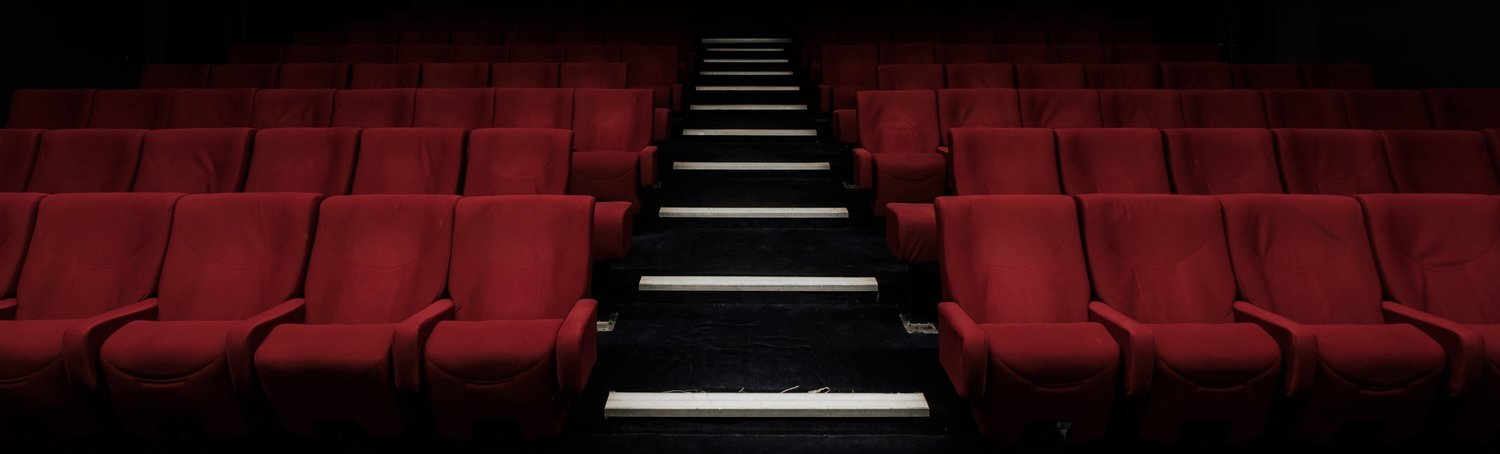

# Plan of Analysis

* Import Datasets
* Explore Data
* Data Preparation
  - Data Cleaning
  - Data Merging
* Data Modeling
* Conclusions
* Further Analysis

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import additional files with statistical functions
import sys
import os

module_path = os.path.abspath(os.path.join('src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import stat_functions as stf
import explore_data as ed 

# Import Datasets

First, I upload the nesessary Datasets into following variables:
* basics: IMDB Title Basics
* ratings: IMDB Title Ratings
* gross: The Number movie budgets
* studios: Rotten Tomatoes Movies

In [2]:
basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
gross = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
studios = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')

# Explore Data

Now, explore the Data and check for following information: 

* What columns do we have in each of the datasets
* Are there any missing values in tables
* Are there duplicates in data

In [3]:
ed.show_info(basics)

Lenght of Dataset: 146144
                 missing_values_% Data_type
tconst                   0.000000    object
primary_title            0.000000    object
original_title           0.014369    object
start_year               0.000000     int64
runtime_minutes         21.717621   float64
genres                   3.700460    object


In [4]:
ed.show_info(ratings)

Lenght of Dataset: 73856
               missing_values_% Data_type
tconst                      0.0    object
averagerating               0.0   float64
numvotes                    0.0     int64


In [5]:
ed.show_info(gross)

Lenght of Dataset: 5782
                   missing_values_% Data_type
id                              0.0     int64
release_date                    0.0    object
movie                           0.0    object
production_budget               0.0    object
domestic_gross                  0.0    object
worldwide_gross                 0.0    object


In [6]:
ed.show_info(studios)

Lenght of Dataset: 17712
                                  missing_values_% Data_type
rotten_tomatoes_link                      0.000000    object
movie_title                               0.000000    object
movie_info                                1.812331    object
critics_consensus                        48.430443    object
content_rating                            0.000000    object
genres                                    0.107272    object
directors                                 1.095303    object
authors                                   8.705962    object
actors                                    1.987353    object
original_release_date                     6.583107    object
streaming_release_date                    2.168022    object
runtime                                   1.772809   float64
production_company                        2.817299    object
tomatometer_status                        0.248419    object
tomatometer_rating                        0.248419   float64

# Data Preparation

To be able to get the most detailed analysis, I clean out the datasets from missing values, unnecessary columns and duplicates. Fill in the necessary values with appropriate values and merge some tables.



## Data Cleaning

### IMDB  Basics Dataset

From the exploration above, it is clear that "basics" dataset "genres" column is missing some values. In this case, it would be appropriate to drop those values from the table. In addition, dropping the unnecessary columns, such that "year" and "original title".

Also, the "runtime" column is missing some values which can be filled in with median runtime value.

In [7]:
basics.dropna(subset = ['genres'], inplace = True)
basics.drop(columns = ['start_year', 'original_title'], inplace = True)

basics.runtime_minutes.fillna(basics.runtime_minutes.median(), inplace = True)

###  IMDB Ratings Dataset

For this analysis, I am dropping the "numvotes" column from dataset as unnecessary.

In [8]:
ratings.drop(columns = ['numvotes'], inplace = True)

### The Number Movie Budgets Dataset

From this dataset, I will drop the "domestic_gross" column, as unnecessary. 

In [9]:
gross.drop(columns = [ 'domestic_gross'], inplace = True)

In order to be able to manipulate the dataset by release date, I will change the "release_date" column type to date type

In [10]:
gross['release_date']= pd.to_datetime(gross['release_date'])

### Rotten Tomatoes Movies Dataset

Following dataset from Rotten Tomatoes contains a lot of information that is not my primary focus, thus I will be dropping the multiple columns

In [11]:
studios.drop(columns = ['rotten_tomatoes_link', 'movie_info', 
                        'critics_consensus','original_release_date', 
                        'tomatometer_status'], inplace = True)

studios.drop(columns = ['tomatometer_count', 'audience_status', 
                        'tomatometer_top_critics_count','tomatometer_fresh_critics_count',
                        'tomatometer_rotten_critics_count'], inplace = True)

## Data Merging

### Merging IMDB Basics and IMDB Ratings Datasets

Exploration shows that the length of "basics" dataset does not match the length of "ratings" table. In order to join two tables it would be appropriate to drop the missing rows and work on remaining part of the dataset.

First, set up index, by which I will join two tables:

In [12]:
basics.set_index('tconst', inplace = True)
ratings.set_index('tconst', inplace = True)

Merge two tables by matching index:

In [13]:
ratings_table = pd.merge(basics, ratings, left_index=True, right_index=True)
ratings_table.head(3)

,primary_title,runtime_minutes,genres,averagerating
tconst,,,,
tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0
tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2
tt0069049,The Other Side of the Wind,122.0,Drama,6.9


Check if the new table has missing values:

In [14]:
ratings_table.isna().sum()

primary_title      0
runtime_minutes    0
genres             0
averagerating      0
dtype: int64

To get the most accurate result of analysis, I will remove the outliers from the "rating_table":

In [15]:
ratings_table = ed.remove_outliers(ratings_table, "runtime_minutes")

### Merging IMDB Basics and The Number Movie Budgets Datasets

The "gross" table has only about 6000 observations. In order to make the analysis more detailed, join to "gross" table the "basics" dataset by matching them on title. If there are still missing values, it would be suitable to drop them at a certain extend. 

First, set up the index by which tables will be joined:

In [16]:
basics.set_index('primary_title', inplace = True)
gross.set_index('movie', inplace = True)

Join two tables in "gross_table" variable and check the result:

In [17]:
gross_table = gross.join(basics)
gross_table.head(3)

,id,release_date,production_budget,worldwide_gross,runtime_minutes,genres
#Horror,16,2015-11-20,"$1,500,000",$0,101.0,"Crime,Drama,Horror"
(500) Days of Summer,55,2009-07-17,"$7,500,000","$34,439,060",NaN,NaN
10 Cloverfield Lane,54,2016-03-11,"$5,000,000","$108,286,422",103.0,"Drama,Horror,Mystery"


Check if the table still has missing values:

In [18]:
gross_table.isna().sum()

id                      0
release_date            0
production_budget       0
worldwide_gross         0
runtime_minutes      3419
genres               3419
dtype: int64

Clear the table by dropping rows with missing values:

In [19]:
gross_table.dropna(subset = ["genres"], inplace = True)

The "production_budget" and "worldwide_gross" columns are object type. In order to calculate the ROI, convert them into float type:

In [20]:
gross_table.production_budget = gross_table.production_budget.str.replace(',', '')
gross_table.production_budget = gross_table.production_budget.str.replace('$', '')
gross_table.production_budget = gross_table.production_budget.astype(float)

gross_table.worldwide_gross = gross_table.worldwide_gross.str.replace(',', '')
gross_table.worldwide_gross = gross_table.worldwide_gross.str.replace('$', '')
gross_table.worldwide_gross = gross_table.worldwide_gross.astype(float)

Reset index and display the table:

In [21]:
gross_table.reset_index(inplace = True)
gross_table.head(3)

,index,id,release_date,production_budget,worldwide_gross,runtime_minutes,genres
0,#Horror,16,2015-11-20,1500000.0,0.0,101.0,"Crime,Drama,Horror"
1,10 Cloverfield Lane,54,2016-03-11,5000000.0,108286422.0,103.0,"Drama,Horror,Mystery"
2,10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,111.0,Drama


# Data Modeling

## What genres are the most popular and giving the most profit?

### Calculate the ROI for top 30 genres

In order to figure out **what genres are the most popular and have the most profit**, first, I will calculate the ROI for each movie and store the the data in ROI column of the "gross_table" dataset:


In [22]:
gross_table['roi'] = gross_table['worldwide_gross'] - gross_table['production_budget']
gross_table.head(3)

,index,id,release_date,production_budget,worldwide_gross,runtime_minutes,genres,roi
0,#Horror,16,2015-11-20,1500000.0,0.0,101.0,"Crime,Drama,Horror",-1500000.0
1,10 Cloverfield Lane,54,2016-03-11,5000000.0,108286422.0,103.0,"Drama,Horror,Mystery",103286422.0
2,10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,111.0,Drama,-11985384.0


Check for missing values:

In [23]:
ed.show_info(gross_table)

Lenght of Dataset: 3743
                   missing_values_%       Data_type
index                           0.0          object
id                              0.0           int64
release_date                    0.0  datetime64[ns]
production_budget               0.0         float64
worldwide_gross                 0.0         float64
runtime_minutes                 0.0         float64
genres                          0.0          object
roi                             0.0         float64


To be able to make analysis more accurate, I will need to remove the ROI outliers from the dataset. It will eliminate the movies that have critical values. 

In [24]:
gross_table = ed.remove_outliers(gross_table, "roi")

Next, I will group table by genres and sort by ROI to find the genres that give most profit:

In [25]:
top_roi = gross_table.groupby("genres").sum().sort_values(by = ['roi'], ascending = False)
top_roi

,id,production_budget,worldwide_gross,runtime_minutes,roi
genres,,,,,
Drama,23034,8.188516e+09,1.282960e+10,44926.0,4.641087e+09
Documentary,12310,5.634092e+09,9.228861e+09,18875.0,3.594769e+09
Comedy,6594,3.171001e+09,5.557331e+09,12428.0,2.386330e+09
"Adventure,Animation,Comedy",1494,1.972500e+09,3.711375e+09,2963.0,1.738875e+09
"Comedy,Drama",5349,1.637679e+09,3.294385e+09,10299.0,1.656706e+09
...,...,...,...,...,...
"Action,Crime,Fantasy",80,9.000000e+07,0.000000e+00,117.0,-9.000000e+07
"Action,Drama,History",374,3.787000e+08,2.864943e+08,755.0,-9.220566e+07
"Biography,Crime,Documentary",217,1.165000e+08,2.201776e+07,367.0,-9.448224e+07


To find the movie genres that are most produced and calculate average ROI for particular genre, I count the movies in each genre:

In [26]:
top_genres = gross_table.genres.value_counts()
top_genres

Drama                          472
Documentary                    269
Comedy                         131
Comedy,Drama                   100
Horror                          89
                              ... 
Documentary,Sport,Thriller       1
Adventure,Sport                  1
Drama,History,Sport              1
Comedy,Mystery                   1
Adventure,Documentary,Music      1
Name: genres, Length: 332, dtype: int64

Next, I merge the information from above table with sorted ROI table:

In [27]:
top_genres_with_roi = pd.merge(top_roi, top_genres, left_index=True, right_index=True)
top_genres_with_roi = top_genres_with_roi.sort_values(by = ['genres'], ascending = False)

Calculate the average ROI for each genre and merge the resulted series into the table:

In [28]:
avg_roi = pd.Series(top_genres_with_roi['roi'] / top_genres_with_roi['genres'], name = 'avg_roi')
avg_roi

top_genres_with_avgroi = pd.merge(top_genres_with_roi, avg_roi, left_index=True, right_index=True)

Select only top 30 genres that were produced the most:

In [29]:
top_genres_with_avgroi = top_genres_with_avgroi.head(30)
top_genres_with_avgroi.head(3)

,id,production_budget,worldwide_gross,runtime_minutes,roi,genres,avg_roi
Drama,23034,8.188516e+09,1.282960e+10,44926.0,4.641087e+09,472,9.832812e+06
Documentary,12310,5.634092e+09,9.228861e+09,18875.0,3.594769e+09,269,1.336346e+07
Comedy,6594,3.171001e+09,5.557331e+09,12428.0,2.386330e+09,131,1.821626e+07


### Visualization of Top 30 Genres with Average ROI

Create a bar plot that contains **the top 30 genres and number of movies** for those movies and average **return on investment**. 

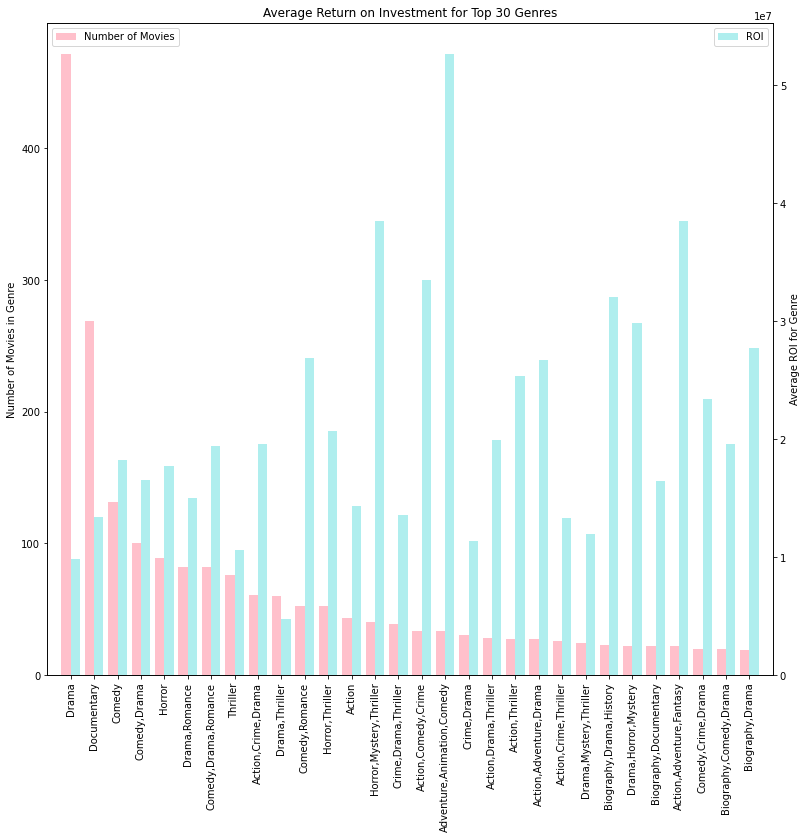

In [30]:
fig = plt.figure(figsize = (13, 12)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

top_genres_with_avgroi.genres.plot(kind = 'bar', color = 'pink', ax = ax, 
                                   width = width, position = 1, label = 'Number of Movies')

top_genres_with_avgroi.avg_roi.plot(kind = 'bar', color = 'paleturquoise', ax = ax2,
                                    width = width, position = 0, label = 'ROI')

ax.set_ylabel('Number of Movies in Genre')
ax2.set_ylabel('Average ROI for Genre')
ax.set_title('Average Return on Investment for Top 30 Genres')

ax.legend(loc = 2)
ax2.legend (loc = 0)

plt.xlim(-1, 30)
plt.show() 

### Analysis of Top 30 Genres with Average ROI

The analysis shows that out of 30 Top genres **the most profitable ones** are "Adventure, Animation, Comedy", "Horror, Mystery, Thriller", "Action, Adventure, Fantasy" and "Action, Comedy, Crime" genres.  But **the most produced genres** are "Drama", "Documentary" and "Comedy".


For Microsoft it would be the most profitable to start production in the "Adventure, Animation, Comedy", "Horror, Mystery, Thriller", "Action, Adventure, Fantasy" and "Action, Comedy, Crime", because they have highest return on investment and not the most produced genres. As a result, Microsoft won't have a lot of competitors. 

## Is there a correlation between the average ratings and the runtime of the movie?

Analysis of the correlation between runtime of the movie and average rating might help Microsoft to figure out what is **the most appropriate and comfortable runtime of the movie based on average rating**.

### Visualization of Correlation between Runtime and Rating

Create a scatterplot that shows the ralation between movie's runtime and average rating

Text(0.5, 1.0, 'Correlation between runtime of the movie and average rating of the movie')

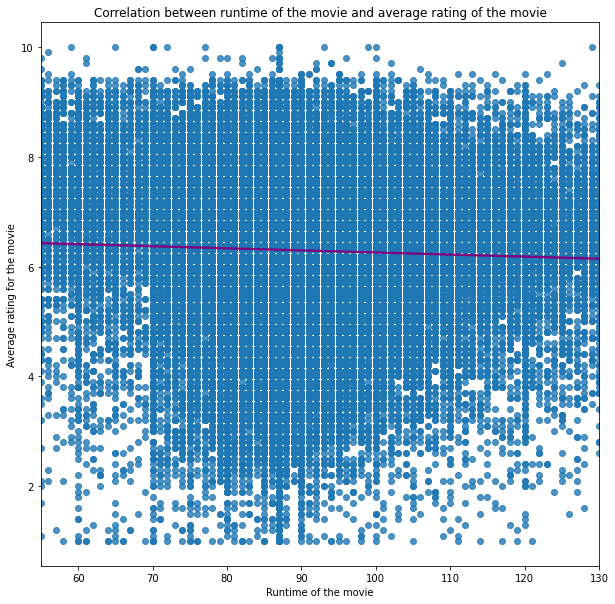

In [31]:
fig = plt.figure(figsize = (10, 10)) 

g = sns.regplot(data = ratings_table, x = "runtime_minutes", 
                y = "averagerating", line_kws = {"color":"purple"})

g.set(xlabel = "Runtime of the movie", ylabel = "Average rating for the movie",  )

plt.title("Correlation between runtime of the movie and average rating of the movie")

To calculate the correlation, we will be using the correlation function from the imported file:

In [32]:
stf.correlation(ratings_table.runtime_minutes,ratings_table.averagerating)

-0.04

### Analysis of Correlation Between Runtime of the Movie and Average Rating

From the calculation and visualization above, it is obvious that **there is no correlation between Runtime and Average Rating of the movie**.

As a result, Microsoft can produce movies with any runtime length, not worring about the ratings. 

## When to release the movies to get the highest profit?

In order to see in which month there is highest rate of movie releases, I need to first, change the data type of "release date" to datatime. Then, group the "gross_table" by 12 months

In [33]:
gross_table['month_of_release'] = gross_table['release_date'].dt.month
gross_table.head(3)

,index,id,release_date,production_budget,worldwide_gross,runtime_minutes,genres,roi,month_of_release
0,#Horror,16,2015-11-20,1500000.0,0.0,101.0,"Crime,Drama,Horror",-1500000.0,11
1,10 Cloverfield Lane,54,2016-03-11,5000000.0,108286422.0,103.0,"Drama,Horror,Mystery",103286422.0,3
2,10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,111.0,Drama,-11985384.0,11


In [34]:
movies_permonth = gross_table['month_of_release'].value_counts()
movies_permonth.sort_index(ascending = True, inplace = True )

### Visualization of Number of Movies released by Months

To better comprehend and **analize in which seasons and months most of the movies are released**, I will plot a bar graph

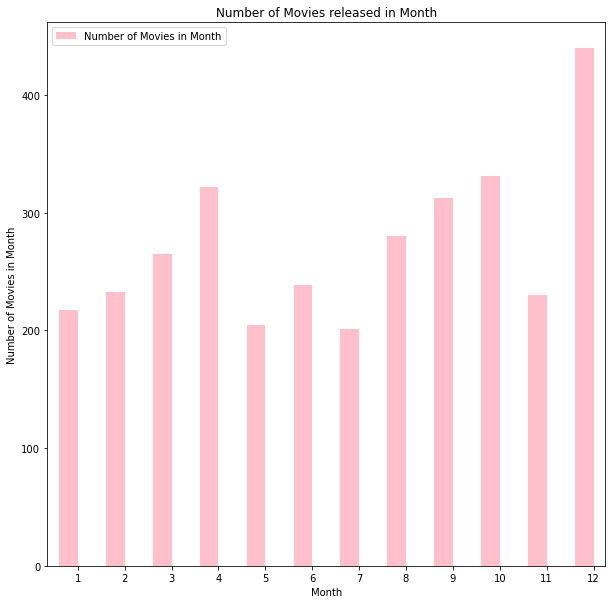

In [35]:
fig = plt.figure(figsize = (10, 10)) 
ax = fig.add_subplot(111)

width = 0.4

movies_permonth.plot(kind = 'bar', color = 'pink', ax = ax, width = width,
                     position = 1, label = 'Number of Movies in Month')

ax.set_ylabel('Number of Movies in Month')
ax.set_xlabel('Month')
ax.set_title('Number of Movies released in Month')
ax.legend(loc = 2)
plt.xticks(rotation = 0)

plt.show() 

Now, I will group the "gross_table" by average profit per month and join to the table the "movies_permonth" values

In [36]:
profit_permonth = gross_table.groupby(["month_of_release"]).mean()
profit_permonth = profit_permonth.join(movies_permonth)

#Rename the joined column name to "num_of_movies"
profit_permonth.rename(columns = {'month_of_release':'num_of_movies'}, inplace = True)
profit_permonth

,id,production_budget,worldwide_gross,runtime_minutes,roi,num_of_movies
month_of_release,,,,,,
1,53.566820,2.182767e+07,4.319669e+07,97.119816,2.136902e+07,217
2,50.875536,2.524200e+07,4.491659e+07,93.351931,1.967459e+07,233
3,48.633962,2.566378e+07,3.957221e+07,92.916981,1.390843e+07,265
4,46.801242,1.993948e+07,3.386807e+07,92.236025,1.392860e+07,322
5,48.190244,2.636482e+07,4.478138e+07,97.678049,1.841656e+07,205
6,53.682008,2.177951e+07,3.188949e+07,90.715481,1.010997e+07,239
7,52.487562,2.571624e+07,4.672345e+07,96.875622,2.100720e+07,201
8,53.992857,2.017686e+07,3.792749e+07,92.603571,1.775063e+07,280
9,47.789137,2.229286e+07,3.549410e+07,95.386581,1.320124e+07,313


***
### Visualization of Correlation between Number of Movies Released and Average ROI

I create a plot with Number of Movies and Average ROI to see in which months the profits are the highest.

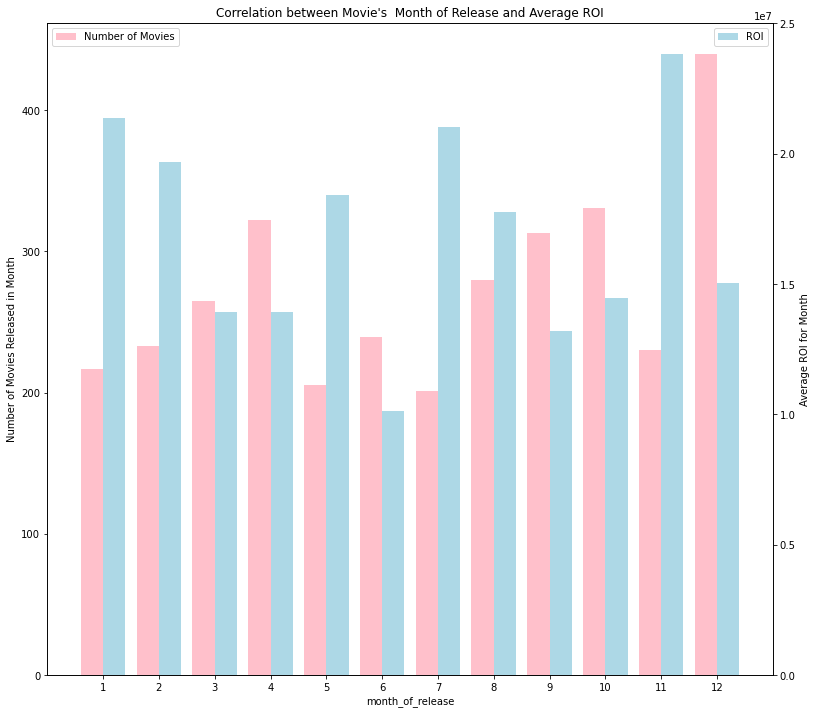

In [37]:
fig = plt.figure(figsize = (13, 12)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

profit_permonth.num_of_movies.plot(kind = 'bar', color = 'pink', ax = ax,
                                   width = width, position = 1, label = 'Number of Movies')

profit_permonth.roi.plot(kind = 'bar', color = 'lightblue', ax = ax2, 
                         width = width, position = 0, label = 'ROI')

ax.set_ylabel('Number of Movies Released in Month')
ax2.set_ylabel('Average ROI for Month')
ax.set_title('Correlation between Movie\'s  Month of Release and Average ROI')

ax.tick_params(axis = 'x', labelrotation = 0)
ax.legend(loc = 2)
ax2.legend (loc = 0)

plt.xlim(-1, 12)
plt.show()



### Analysis of the Correlation between Realease Month and Average ROI

The calculation and visualizations from above show that releasing movies during some of the months have very high profits. Those months are January, February, July, November. During this months tickets sales are high, where as June and September are the least profitable times. Also, as the table shows from the above, in December the movie production companies release the highest amout of movies. 


As a result, Microsoft can plan the **releases of their movies in highly profitable months**, so the tickets sales would be on top too and **avoid releasing in low profit months**. Also, it would be highly recommended to not relase movies when the release amount is very high, because it will have high competition.

***

## What are the Top 10 succesfull studios and what are their content ratings focus?


Select from Rotten Tomato Movies 10 studios that produced the largest amount of movies. 

In [38]:
top_studios = studios.production_company.value_counts().head(10)
top_studios

Paramount Pictures                  517
Warner Bros. Pictures               509
Universal Pictures                  495
20th Century Fox                    423
IFC Films                           413
Sony Pictures Home Entertainment    388
Warner Home Video                   369
Netflix                             357
MGM                                 279
Sony Pictures Classics              262
Name: production_company, dtype: int64

In [39]:
top_ten_studios = pd.DataFrame(data = top_studios)
top_ten_studios.rename(columns = {'production_company':'num_of_movies'}, inplace = True)

Retrieve all the data from "studios" dataset for the selected ten production companies and store that dataset under "studios_table" variable. 

In [40]:
studios_table = studios[studios['production_company'].isin(top_ten_studios.index)]
studios_table.head(3)

,movie_title,content_rating,genres,directors,authors,actors,streaming_release_date,runtime,production_company,tomatometer_rating,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2015-11-25,119.0,20th Century Fox,49.0,53.0,254421.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2012-09-04,90.0,Sony Pictures Classics,87.0,64.0,11574.0
5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2013-06-22,109.0,Warner Bros. Pictures,8.0,37.0,411140.0


Group the table by studios and content ratings, to count how many movies companies produce in this particular rating category.

In [41]:
studios_table = studios_table.groupby(['production_company', 'content_rating']).count()

Drop unnecessary columns that are irrelevant for the analysis.

In [42]:
studios_table.drop(inplace = True, columns = ['genres','directors','authors','actors',
                                              'streaming_release_date','runtime','tomatometer_rating',
                                              'audience_rating','audience_count'])
studios_table.reset_index(inplace = True)

***
### Visualization of Top 10 Studios with the content rating categories

I create the barplot which shows **the number of movies the 10 studios produce in particular content rating**, to see what are the most popular ones. 

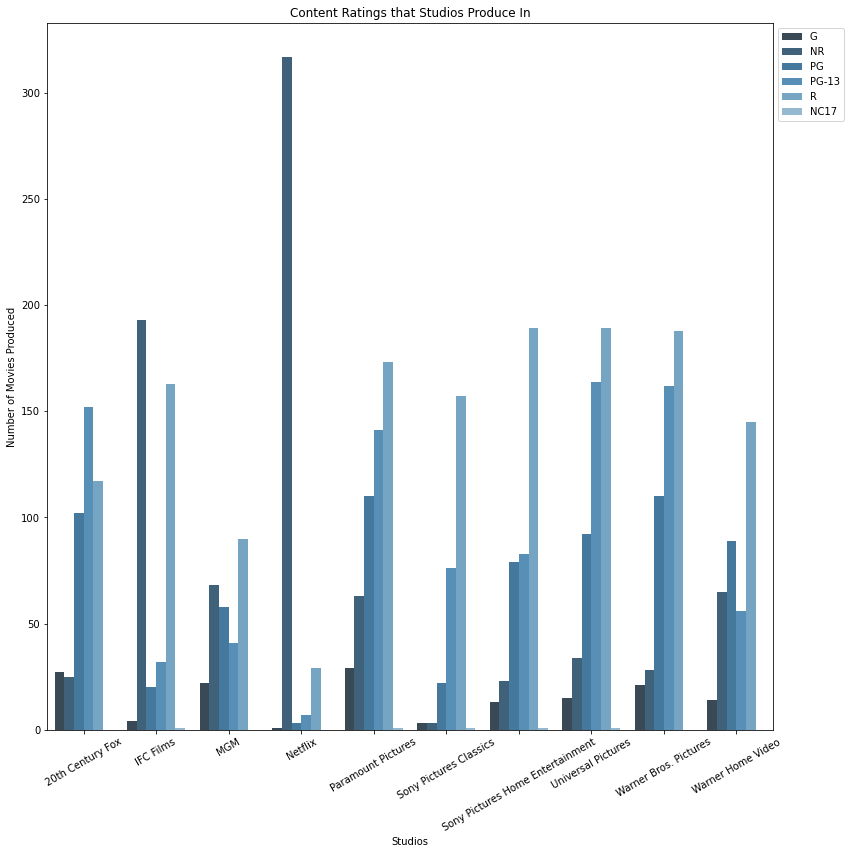

In [43]:
fig = plt.figure(figsize = (13, 13)) 

g = sns.barplot(data = studios_table, x = "production_company", y = "movie_title", 
                hue = "content_rating", palette = "Blues_d")

g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set(xlabel = "Studios", ylabel = "Number of Movies Produced",  )

plt.title("Content Ratings that Studios Produce In")
plt.legend(bbox_to_anchor = (1,1), loc = 2)

***
### Analysis of Top 10 Studios and Content Ratings

The table from above shows that **the most common content rating is "R" rating**, which is movies for audience older than 17. **The least produced ones are "G"- General Audience and "PG" - Parental Guidance Suggested**. 

Also, we see that most of the movies of "Netflix" company is not rated( "NR" - not rated). 

For Microsoft, this analysis would help to study the most successfull studios. Maybe it can produce movies in one niche that is not so produced, such that "G" and "PG". Or go with most common ones to be sure that they will hit some popularity, but have a high competition. 

***

# Conclusions
This analysis provides Microsoft with insight to movie industry on factors to consider to increase the chance of producing movies that will hit the top in cinematography. The following are the recommendations:

* **It would be the most profitable**  for Microsoft to make movies in "Adventure, Animation, Comedy", "Action, Adventure, Sci-Fi", "Action, Adventure, Fantasy" and "Action, Adventure, Comedy", because they have highest return on investment and not the most produced genres. Thus, increasing the chances to get interest of audience. 

* When producing movies, do not give extra attention to runtime, because the **ratings are not correlated with length of movie**. 

* **The most proftable months for movie release** are  May, June, July and November. Microsoft would hit highest ROI during these months. Also, it is recomended to avoid releaing in April, September, October and December, considering the fact that profits arew low during these times and December has the highest amount of releases. 

* **When choosing the content rating**, it would be suggested to choose the most popular one, such that "R". Because it would have high chances to get interest of audience. Or choose the least produced one as a niche, which might be less competative. 


***

# Further Analysis

Modeling following analysis could give more detailed insights to Microsoft about the industry:

* **Study of relation between average rating and actors in the movie** could be helpful to strategize the casting for the movie
* **Comparing the profits from domestic gross and worldwide gross** will help to focus on proper audience and market
* **Analysis of movies based on critics rating and directors**, will help to identify which directors get the highest ratings from critics.